In [1]:
import csv
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# indexes 0-based/1-based:
#           0/1     1/2  2/3     3/4   4/5              5/6          6/7
# format is station,date,measure,value,measurement flag,quality flag,source flag

In [3]:
stations = {}

with open('2019_TMAX.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3]) / 10
        stations.setdefault(line[0], {}).setdefault('maxes', []).append(value)

with open('2019_TMIN.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3]) / 10
        stations.setdefault(line[0], {}).setdefault('mins', []).append(value)

In [4]:
len(stations)

13946

In [5]:
min_days = 350
low_data = [station for station, data in stations.items()
            if len(data.get('maxes', [])) < min_days or
               len(data.get('mins', [])) < min_days]

In [6]:
len(low_data)

5555

In [7]:
for station in low_data:
    del stations[station]

In [8]:
len(stations)

8391

In [13]:
# original method (always within):
# penalize when min < cold and when hot < max
cold, hot = -6, 32  # 21.2 F, 89.6 F

scores = []
for station, data in stations.items():
    heat = [(temp - hot)**2 if temp > hot else 0
            for temp in data['maxes']]
    heat = (sum(heat) / len(heat))**0.5
    cool = [(temp - cold)**2 if temp < cold else 0
            for temp in data['mins']]
    cool = (sum(cool) / len(cool))**0.5
    scores.append([station, heat, cool, heat + cool])

In [14]:
len(scores)

8391

In [15]:
scores.sort(key=lambda line: line[3])

In [16]:
scores[:10]

[['ASN00009518', 0.0, 0.0, 0.0],
 ['ASN00039059', 0.0, 0.0, 0.0],
 ['ASN00069137', 0.0, 0.0, 0.0],
 ['ASN00091245', 0.0, 0.0, 0.0],
 ['ASN00091259', 0.0, 0.0, 0.0],
 ['ASN00091292', 0.0, 0.0, 0.0],
 ['ASN00091293', 0.0, 0.0, 0.0],
 ['ASN00092123', 0.0, 0.0, 0.0],
 ['ASN00094041', 0.0, 0.0, 0.0],
 ['ASN00094087', 0.0, 0.0, 0.0]]

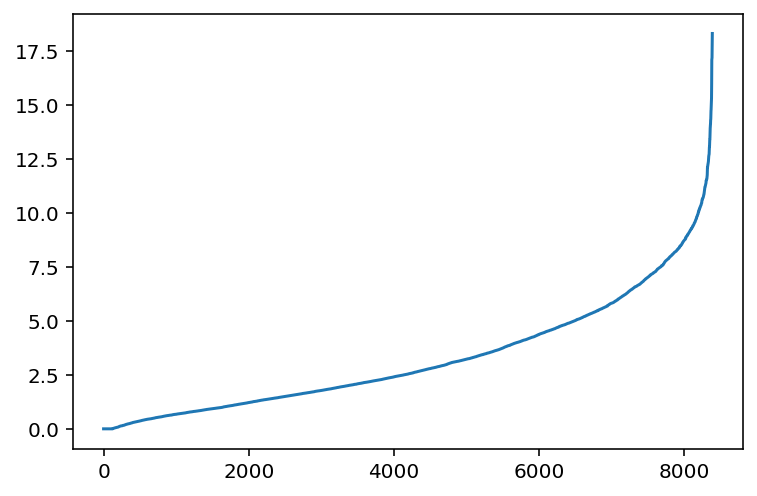

In [17]:
# total
plt.plot([line[3] for line in scores])

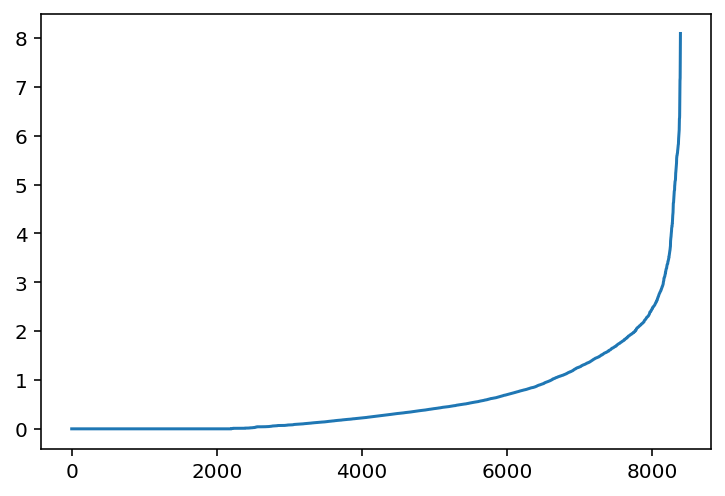

In [18]:
# heat
scores.sort(key=lambda line: line[1])
plt.plot([line[1] for line in scores])

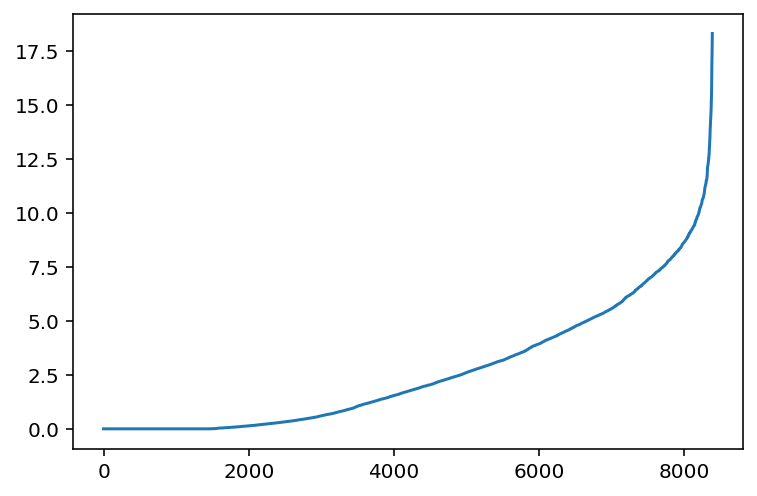

In [19]:
# cold
scores.sort(key=lambda line: line[2])
plt.plot([line[2] for line in scores])

In [20]:
locations = {}
with open('ghcnd-stations.txt') as f:
    for line in f:
        line = line.split()
        locations[line[0]] = [float(line[1]), float(line[2]), ' '.join(line[4:])]

In [21]:
results = []
for line in scores:
    if line[0] not in locations:
        continue
    results.append(line + locations[line[0]])

In [22]:
results[0]

['ASN00009518', 0.0, 0.0, 0.0, -34.3728, 115.1358, 'CAPE LEEUWIN GSN 94601']

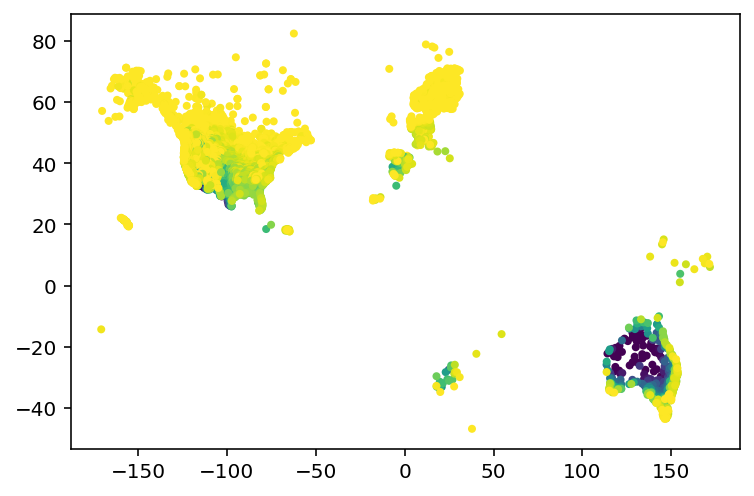

In [25]:
# not too hot
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[5 - line[1] if line[1] < 5 else 0 for line in results],
            marker='.')

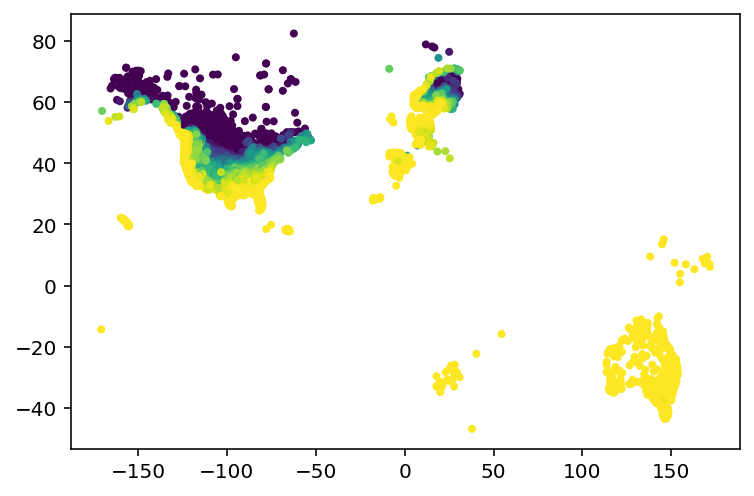

In [26]:
# not too cold
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[5 - line[2] if line[2] < 5 else 0 for line in results],
            marker='.')

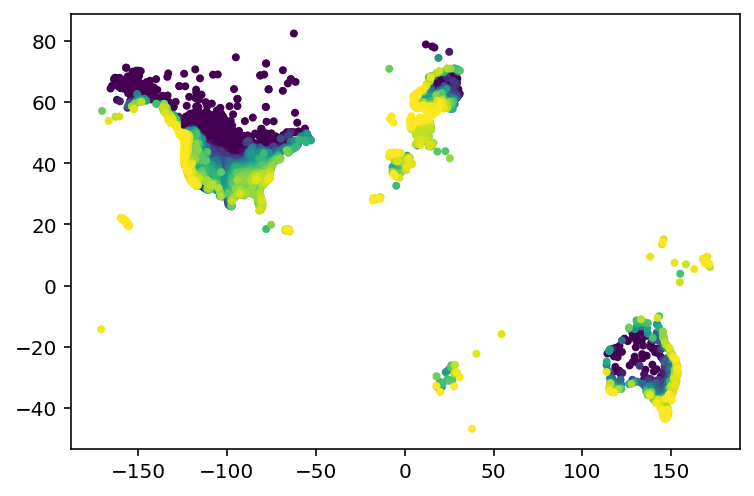

In [23]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[5 - line[3] if line[3] < 5 else 0 for line in results],
            marker='.')

In [112]:
# looking interesting! missing a lot of places though

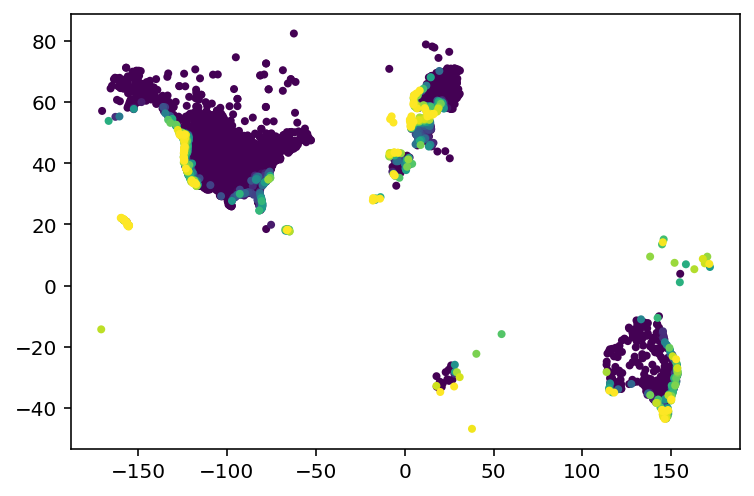

In [32]:
results.sort(key=lambda line: -line[3])  # draw good places last
plt.scatter([line[5] for line in results],
            [line[4] for line in results],
            c=[1 - line[3] if line[3] < 1 else 0 for line in results],
            marker='.')

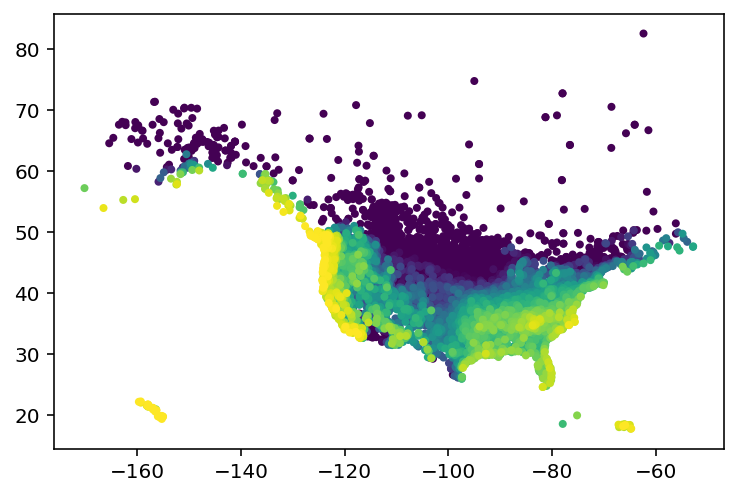

In [30]:
# just the US
results.sort(key=lambda line: -line[3])  # draw good places last
r = [line for line in results if line[5] < -40 and line[4] > 0]
plt.scatter([line[5] for line in r],
            [line[4] for line in r],
            c=[5 - line[3] if line[3] < 5 else 0 for line in r],
            marker='.')

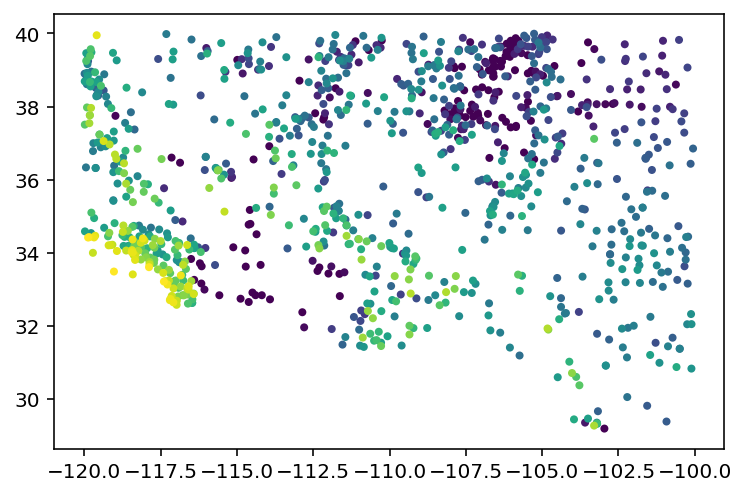

In [31]:
# just the US
results.sort(key=lambda line: -line[3])  # draw good places last
r = [line for line in results if -120 < line[5] < -100 and 40 > line[4] > 25]
plt.scatter([line[5] for line in r],
            [line[4] for line in r],
            c=[5 - line[3] if line[3] < 5 else 0 for line in r],
            marker='.')

In [ ]:
33, -118

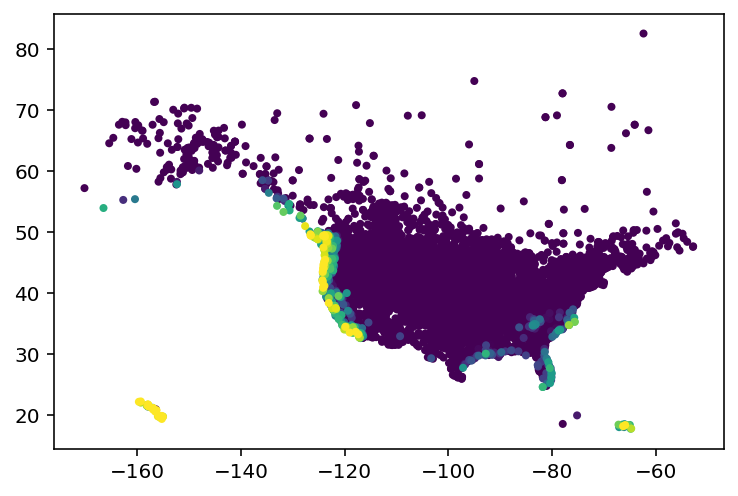

In [33]:
# just the US
results.sort(key=lambda line: -line[3])  # draw good places last
r = [line for line in results if line[5] < -40 and line[4] > 0]
plt.scatter([line[5] for line in r],
            [line[4] for line in r],
            c=[1 - line[3] if line[3] < 1 else 0 for line in r],
            marker='.')

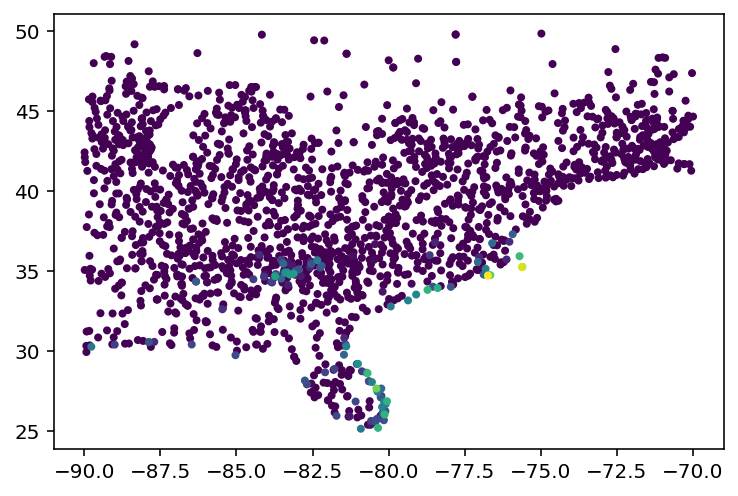

In [34]:
# closer in yet...
results.sort(key=lambda line: -line[3])  # draw good places last
r = [line for line in results if -90 < line[5] < -70 and 50 > line[4] > 25]
plt.scatter([line[5] for line in r],
            [line[4] for line in r],
            c=[1 - line[3] if line[3] < 1 else 0 for line in r],
            marker='.')

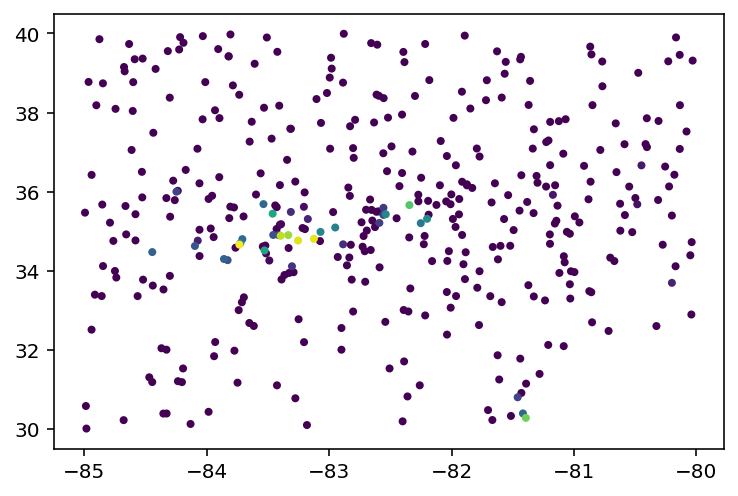

In [36]:
# closer in yet...
results.sort(key=lambda line: -line[3])  # draw good places last
r = [line for line in results if -85 < line[5] < -80 and 40 > line[4] > 30]
plt.scatter([line[5] for line in r],
            [line[4] for line in r],
            c=[1 - line[3] if line[3] < 1 else 0 for line in r],
            marker='.')

In [37]:
r[-3:]

[['USC00385278',
  0.21054397907156486,
  0.32963242292980727,
  0.5401764020013722,
  34.7683,
  -83.2544,
  'SC LONG CREEK'],
 ['USR0000SANP',
  0.24612058521333255,
  0.28669108954049793,
  0.5328116747538305,
  34.8117,
  -83.125,
  'SC ANDREW PICKENS SOUTH CAROLINA'],
 ['USC00097827',
  0.0,
  0.5157626201387707,
  0.5157626201387707,
  34.6647,
  -83.7342,
  'GA SAUTEE 3W']]

In [ ]:
34.6647, -83.7342

In [27]:
# Looking at this:
# https://www.bobvila.com/slideshow/these-are-the-places-with-the-best-weather-in-america-51983
# They rate Jackson, KY...
# Also they use a "number of days" criteria, which is maybe better than my squared one...

In [28]:
# Also, I wish I had humidity information...